# Debates about the refugee crisis in Europe

Student names: Nand Rizvanolli, Stan van der Bij, Sem van Veen, Noah Hamzaoui

Team number: K3

In [23]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import itertools




# Load image from link
url = 'https://cdn.cbs.nl/images/6d6937674277573235627978534b49652b6e323757513d3d/900x450.jpg'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "© Hollandse Hoogte / Peter Hilz"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© Hollandse Hoogte / Peter Hilz


## Introduction

Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu.

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh.

## Dataset and Preprocessing

### Datasets

This study utilizes multiple datasets sourced from various reputable organizations. Below is an overview of each dataset and the variables they contain:

1. [**RESPOND Dataset - Refugee Protection**](https://zenodo.org/records/4653406)
   - **Variables:** 33 Variables
   - **Description:** (2017-2020) Responses from interviews conducted with refugees.

2. [**United Narions (UN) World Refugee Data**](https://www.kaggle.com/datasets/avtnshm/united-nations-refugee-data-unhcr)
   - **Variables:** 12 Variables
   - **Description:** (1953-2023) Yearly data on the number of refugees worldwide as reported by the United Nations.

3. [**World Population Data**](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset)
   - **Variables:** 17 Variables
   - **Description:** (1960-2022) Yearly population statistics for countries around the world.

4. [**World GDP**](https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths)
   - **Variables:** 64 Variables
   - **Description:** (1960-2020) Yearly information on the Gross Domestic Product (GDP) for countries around the world.

5. [**Refugees Germany**](https://data.mendeley.com/datasets/p7k35cghyb/2)
   - **Variables:** 21 Variables
   - **Description:** ....

6. [**Pending Status Refugees**](https://www.kaggle.com/datasets/unitednations/refugee-data)
   - **Variables:** 14 Variables
   - **Description:** (2000-2016) Yearly progress of asylum-seekers through the refugee status determination process, with data on UNHCR assistance.


### Preprocessing

The preprocessing of these datasets involved several steps to ensure that the data was suitable for analysis. The key preprocessing steps are outlined below:

1. **Filtering for European Countries:**
   - The analysis focused solely on European countries. Therefore, non-European countries were excluded from the datasets.

2. **Selecting Relevant Columns:**
   - Not all columns in each dataset were necessary for the analysis. Only the relevant columns were retained. The specific columns selected for each dataset are as follows:
     - **Refugee Interview Dataset:**
       - Columns: [Specify relevant columns]
     - **UN World Refugee Data:**
       - Year
       - Country of origin
       - Country of asylum
       - Refugees under UNCHR's mandate
       - ...
     - **World Population Data:**
       - Country
       - Population over the years
     - **World GDP:**
       - Country
       - GDP Per Capita (Economic output of a country per inhabitant)
       - GDP PPP Per Capita (Economic output of a country per inhabitant adjusted for purchasing power)
     - **Refugees Germany:**
       - Columns: [Specify relevant columns]
     - **Pending Status Refugees:**
       - Columns: [Specify relevant columns]

3. **Data Cleaning:**
   - Missing values and inconsistencies in the data were addressed. This involved handling null values, correcting data entry errors, and ensuring uniformity in data formats.

4. **Data Integration:**
   - The datasets were merged based on common keys such as country names and years to create a comprehensive dataset for analysis.

5. **Normalization and Scaling:**
   - Where necessary, numerical variables were normalized or scaled to facilitate comparison across different units and magnitudes.

By following these preprocessing steps, we ensured that the datasets were clean, consistent, and ready for subsequent analysis.

## Amount of refugees

The data and graphs reveal a consistent upward trend in refugee intake per capita across Europe. Top countries like Germany, Sweden, and Austria are experiencing significant increases, indicating escalating pressure on their resources. The top 10 countries per capita plot highlights nations bearing a substantial burden, with steep upward trends showing a continuous rise in refugee numbers. Even countries below the top 10 average are experiencing increases, suggesting a broad and worsening issue across Europe. The overall plot for all countries shows a general upward trend, underscoring the continent-wide nature of the crisis. This comprehensive data indicates that the refugee crisis in the EU is escalating, with growing numbers of refugees putting increasing pressure on multiple European nations.

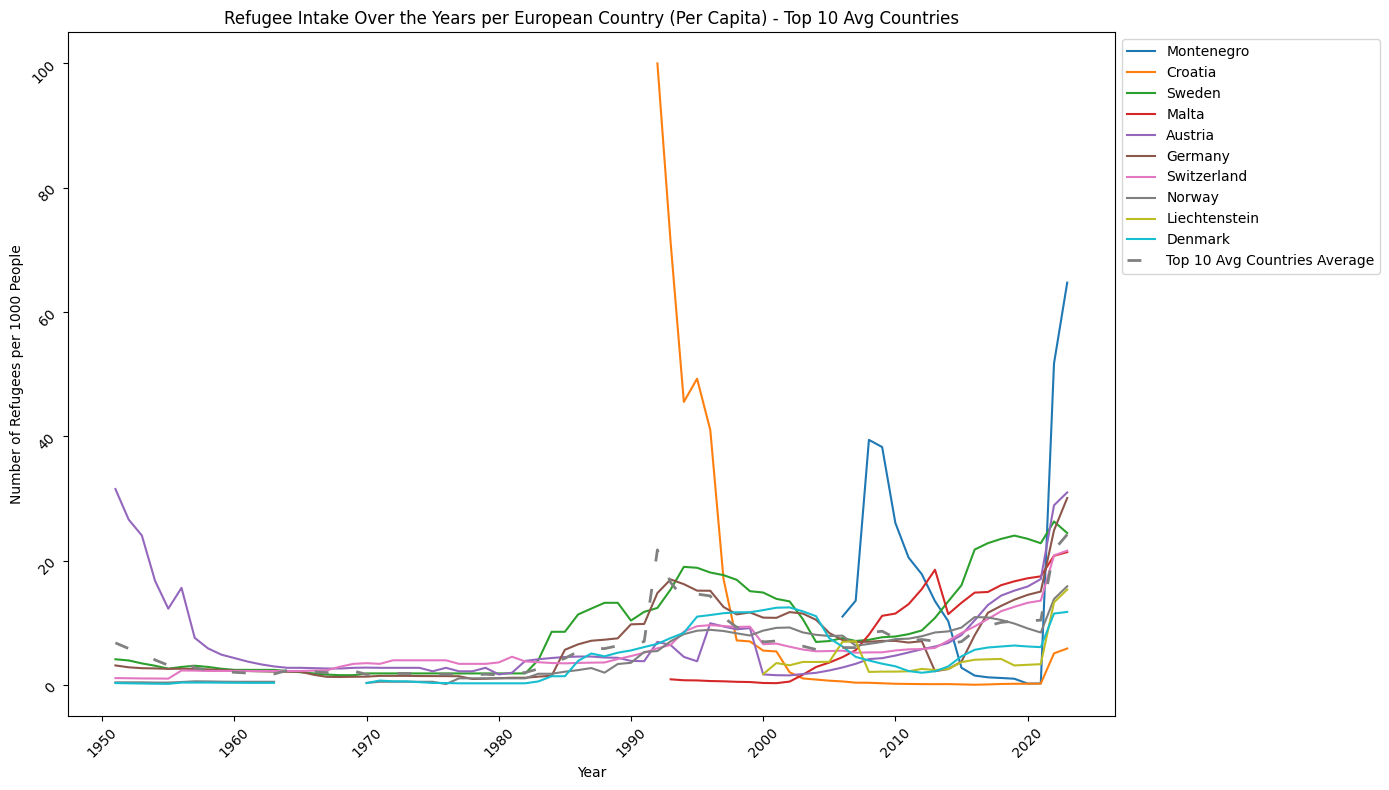

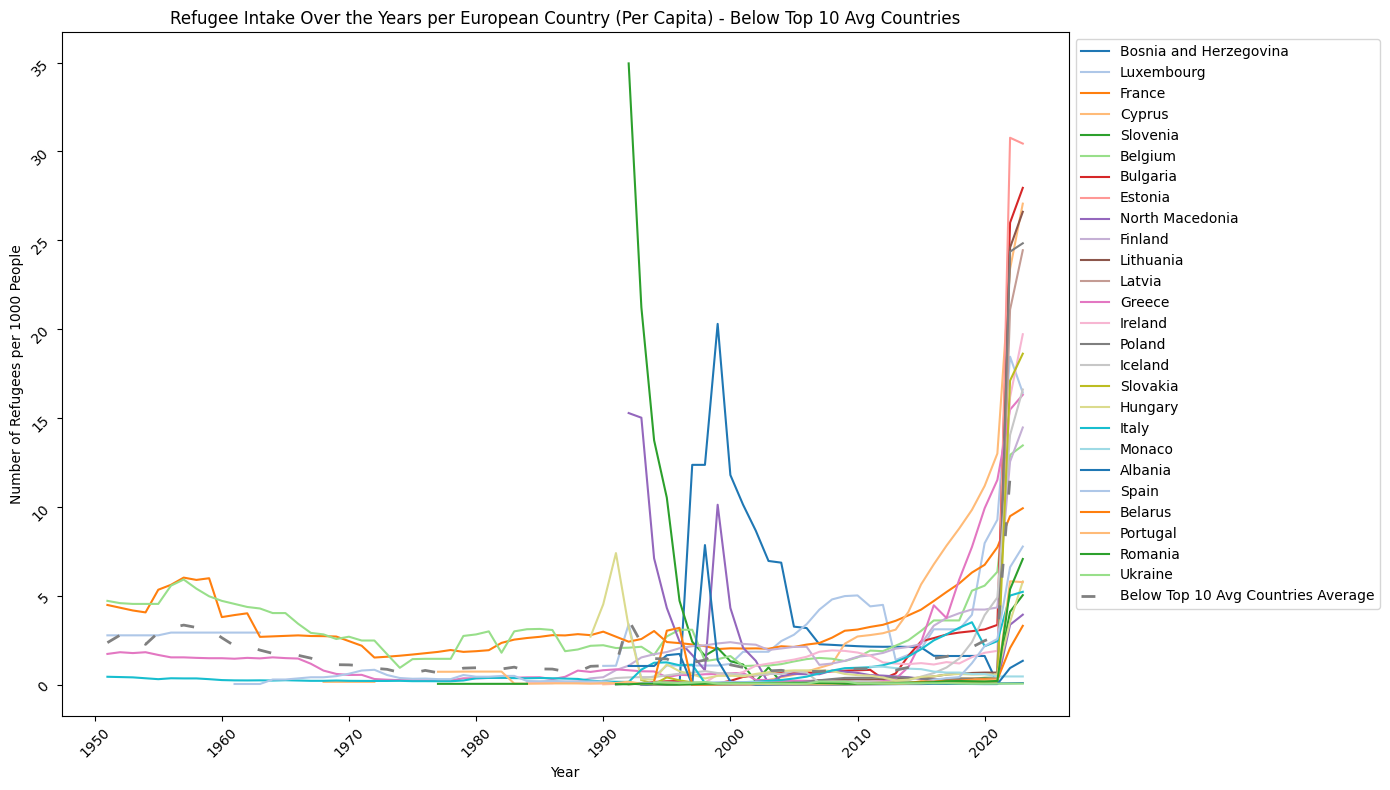

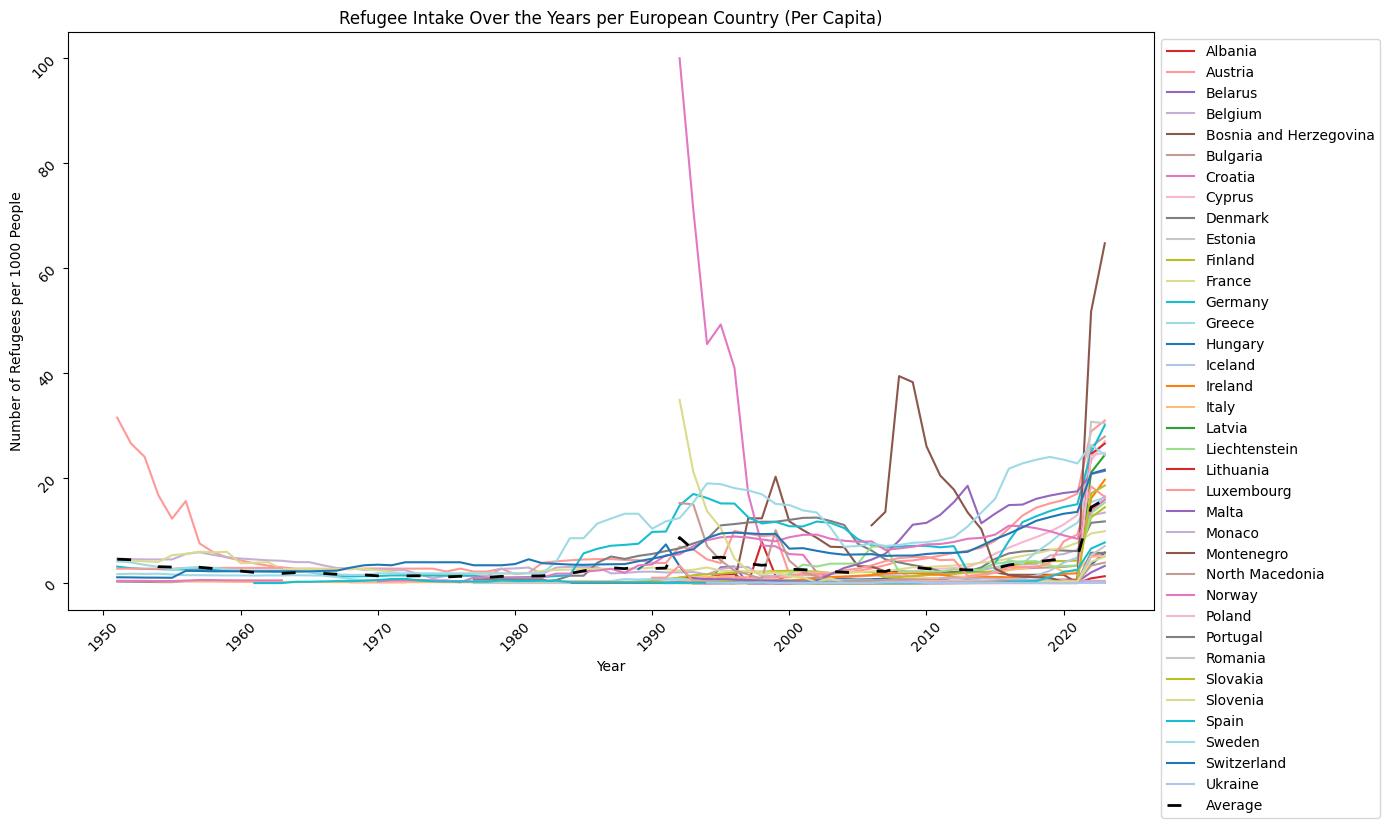

In [24]:
# Define a list of line styles
line_styles = ['-', '--', '-.', ':']

# Define a custom striped line style
striped_line = (0, (5, 10))

# Define remaining colors cycle
remaining_colors = itertools.cycle(plt.cm.tab20.colors)

# Load the population data from the provided CSV file
population_file_path = 'DataSets/european_population.csv'
population_data = pd.read_csv(population_file_path)

# Load the refugee data from the provided CSV file
refugee_file_path = 'DataSets/UN_European_Countries_Refugee_Data.csv'
refugee_data = pd.read_csv(refugee_file_path)

# Merge refugee data with population data
# For simplicity, we'll use the 2022 population data for all years
population_2022 = population_data[['Country/Territory', '2022 Population']]
population_2022.columns = ['Country of asylum', 'Population']

# Merge population data with refugee data
data_with_population = refugee_data.merge(population_2022, on='Country of asylum', how='left')

# Calculate refugees per capita
data_with_population['Refugees per 1000'] = (data_with_population['Refugees under UNHCR\'s mandate'] / data_with_population['Population']) * 1000

# Extract relevant columns and group by year and country
data_grouped_per_capita = data_with_population.groupby(['Year', 'Country of asylum'])['Refugees per 1000'].sum().unstack()

# Calculate the average line
average_line_per_capita = data_grouped_per_capita.mean(axis=1)

# Re-calculate top 10 countries by average refugee intake per capita
average_refugees_per_year_per_capita = data_grouped_per_capita.mean()
top_10_avg_countries_per_capita = average_refugees_per_year_per_capita.sort_values(ascending=False).head(10).index

# Create a distinct color map for the top 10 average countries
top_10_avg_colors_per_capita = {country: color for country, color in zip(top_10_avg_countries_per_capita, plt.cm.tab10.colors)}

# Calculate the average line for the top 10 average countries
top_10_avg_countries_data_per_capita = data_grouped_per_capita[top_10_avg_countries_per_capita]
top_10_avg_line_per_capita = top_10_avg_countries_data_per_capita.mean(axis=1)

# Plot for the top 10 average countries per capita
plt.figure(figsize=(14, 8))
for country in top_10_avg_countries_per_capita:
    plt.plot(data_grouped_per_capita.index, data_grouped_per_capita[country], label=country, linestyle='-', color=top_10_avg_colors_per_capita[country])

# Plot the top 10 average line with a different striped style
plt.plot(data_grouped_per_capita.index, top_10_avg_line_per_capita, label='Top 10 Avg Countries Average', linestyle=striped_line, color='grey', linewidth=2)

# Set plot title and labels
plt.title('Refugee Intake Over the Years per European Country (Per Capita) - Top 10 Avg Countries')
plt.xlabel('Year')
plt.ylabel('Number of Refugees per 1000 People')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

# Calculate the average line for the countries below top 10 average
below_top_10_avg_countries_per_capita = average_refugees_per_year_per_capita.sort_values(ascending=False).iloc[10:].index
below_top_10_avg_countries_data_per_capita = data_grouped_per_capita[below_top_10_avg_countries_per_capita]
below_top_10_avg_line_per_capita = below_top_10_avg_countries_data_per_capita.mean(axis=1)

# Plot for the countries below top 10 average per capita
plt.figure(figsize=(14, 8))
for country in below_top_10_avg_countries_per_capita:
    plt.plot(data_grouped_per_capita.index, data_grouped_per_capita[country], label=country, linestyle=next(itertools.cycle(line_styles)), color=next(remaining_colors))

# Plot the below top 10 average line with a different striped style
plt.plot(data_grouped_per_capita.index, below_top_10_avg_line_per_capita, label='Below Top 10 Avg Countries Average', linestyle=striped_line, color='grey', linewidth=2)

# Set plot title and labels
plt.title('Refugee Intake Over the Years per European Country (Per Capita) - Below Top 10 Avg Countries')
plt.xlabel('Year')
plt.ylabel('Number of Refugees per 1000 People')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

# Plot for all countries with per capita values
plt.figure(figsize=(14, 8))
for country in data_grouped_per_capita.columns:
    plt.plot(data_grouped_per_capita.index, data_grouped_per_capita[country], label=country, linestyle=next(itertools.cycle(line_styles)), color=next(remaining_colors))

# Plot the average line with a striped style
plt.plot(data_grouped_per_capita.index, average_line_per_capita, label='Average', linestyle=striped_line, color='black', linewidth=2)

# Set plot title and labels
plt.title('Refugee Intake Over the Years per European Country (Per Capita)')
plt.xlabel('Year')
plt.ylabel('Number of Refugees per 1000 People')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

*Figure \$: Refugee intake per European country per capita.* \
*Figure \$: Refugee intake per European country per capita top 10 average countries.* \
*Figure \$: Refugee intake per European country per capita below top 10 average countries.*


The graphs above clearly illustrate the escalating refugee crisis in Europe. From 2014 to 2016, there's a marked increase in refugee intake per capita, especially in top countries like Germany, Sweden, and Austria. These nations are experiencing significant pressure on their resources due to the surge in refugee numbers. Even countries not in the top 10 are seeing notable increases, indicating that this is a widespread issue affecting the entire continent. The overall trend across all European countries shows a continuous rise in refugee intake, underscoring the urgent need for comprehensive and coordinated policy responses to manage this growing crisis.

## Distribution over Europe

This map shows the distribution of refugees over Europe from 1951 to 2023

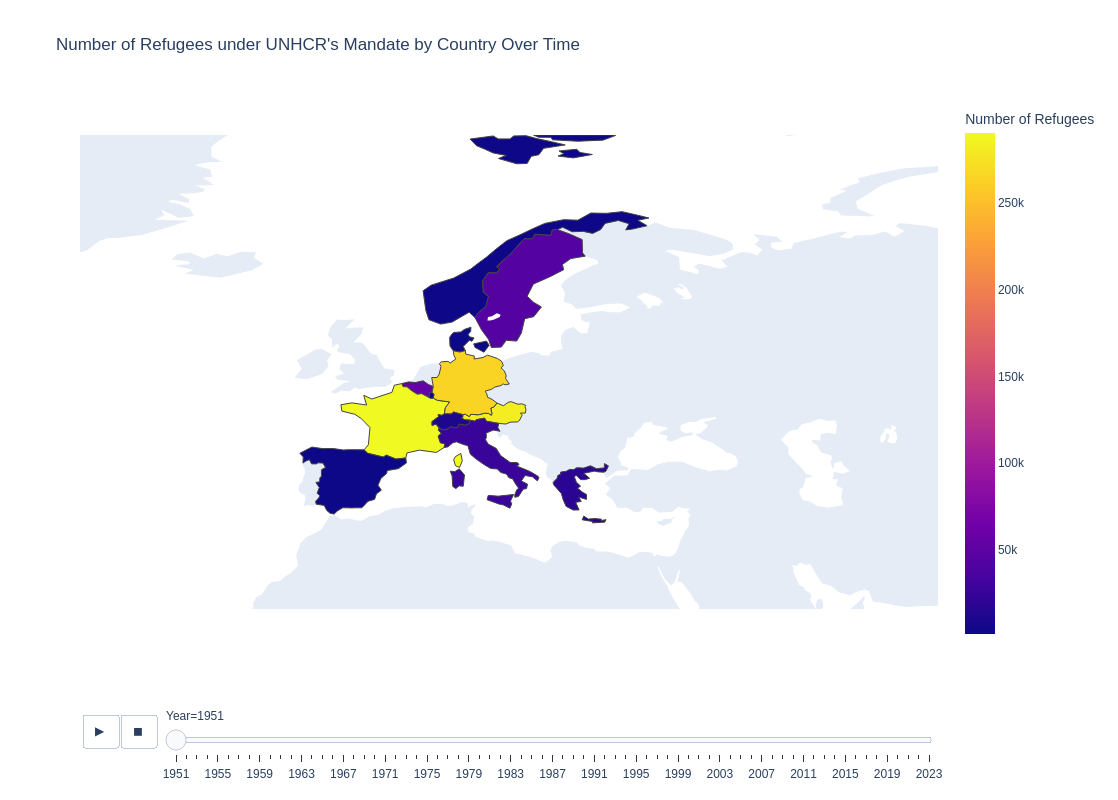

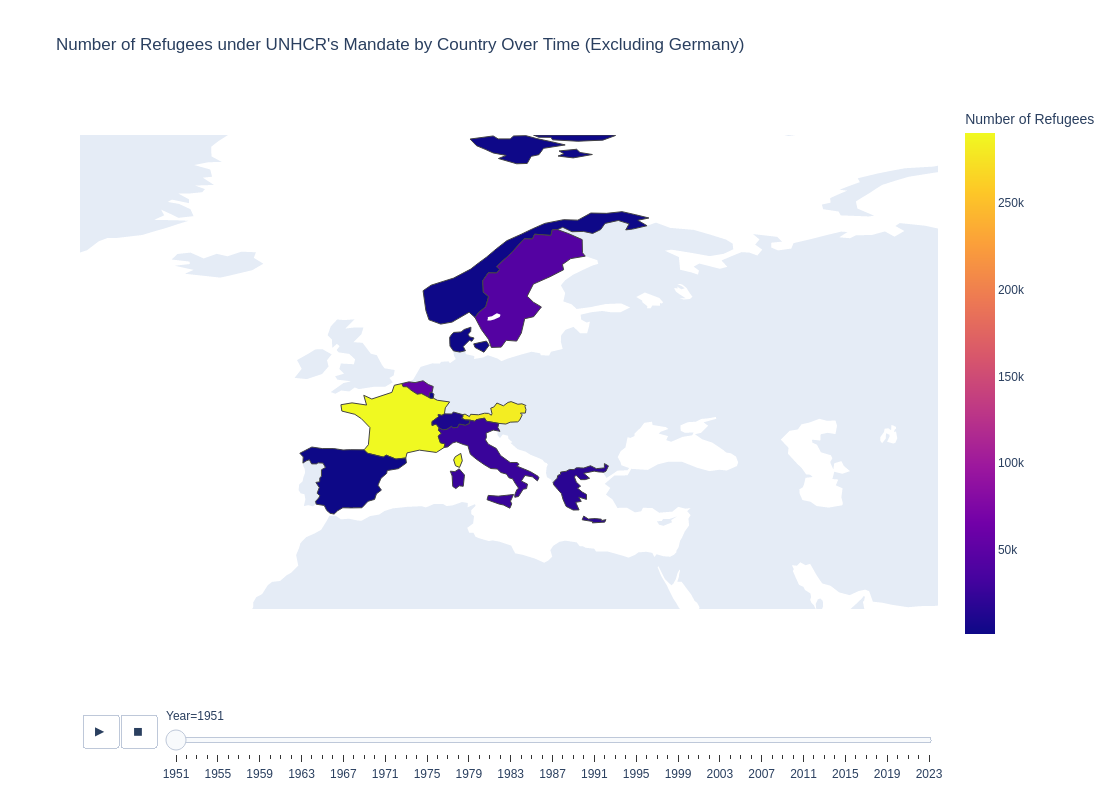

In [25]:
file_path = 'DataSets/UN_European_Countries_Refugee_Data.csv'
df = pd.read_csv(file_path)

agg_df = df.groupby(['Year', 'Country of asylum', 'Country of asylum (ISO)'])['Refugees under UNHCR\'s mandate'].sum().reset_index()

fig = px.choropleth(
    agg_df,
    locations="Country of asylum (ISO)",
    color="Refugees under UNHCR's mandate",
    hover_name="Country of asylum",
    animation_frame="Year",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Number of Refugees under UNHCR's Mandate by Country Over Time",
    labels={'Refugees under UNHCR\'s mandate': 'Number of Refugees'}
)

# Layout update
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        lataxis=dict(range=[25, 80]), 
        lonaxis=dict(range=[-35, 65])
    ),
    coloraxis_colorbar=dict(
        title="Number of Refugees"
    ),
    width=1200,
    height=800
)

fig.show()

# Excluding germany
df_excl_germany = df[df['Country of asylum'] != 'Germany']
agg_df_excl_germany = df_excl_germany.groupby(['Year', 'Country of asylum', 'Country of asylum (ISO)'])['Refugees under UNHCR\'s mandate'].sum().reset_index()

fig_excl_germany = px.choropleth(
    agg_df_excl_germany,
    locations="Country of asylum (ISO)",
    color="Refugees under UNHCR's mandate",
    hover_name="Country of asylum",
    animation_frame="Year",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Number of Refugees under UNHCR's Mandate by Country Over Time (Excluding Germany)",
    labels={'Refugees under UNHCR\'s mandate': 'Number of Refugees'}
)

fig_excl_germany.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        lataxis=dict(range=[25, 80]), 
        lonaxis=dict(range=[-35, 65])
    ),
    coloraxis_colorbar=dict(
        title="Number of Refugees"
    ),
    width=1200,
    height=800
)

fig_excl_germany.show()

As can be seen in both graphs, in recent years, there is a noticeable increase in the number of refugees, especially in the larger countries. Germany specifically seems to have a substantial increase in refugees in recent years. The country seems to have had a substantially larger number of refugees since 1985. The massive number of refugees in Germany compared to the other countries seems to indicate a poor distribution of refugees across Europe. Even when removing Germany from the map, as can be seen in the second graph, the refugees don't seem to be well-distributed in Europe, with especially France taking in most refugees, with Sweden seeming to be next and the rest of western, southern and northern Europe following. Most of Central and Eastern Europe seem to have fewer refugees.

The poor distribution of refugees across Europe and most refugees going to seemingly richer countries, combined with the increased number of refugees overall in Europe, indicates a refugee crisis.


## Influence of refugees on a country

### Asylum applications

The graph shows a dramatic increase in asylum applications in Europe from 2013 to 2016, with numbers peaking over 1.2 million in 2016. 

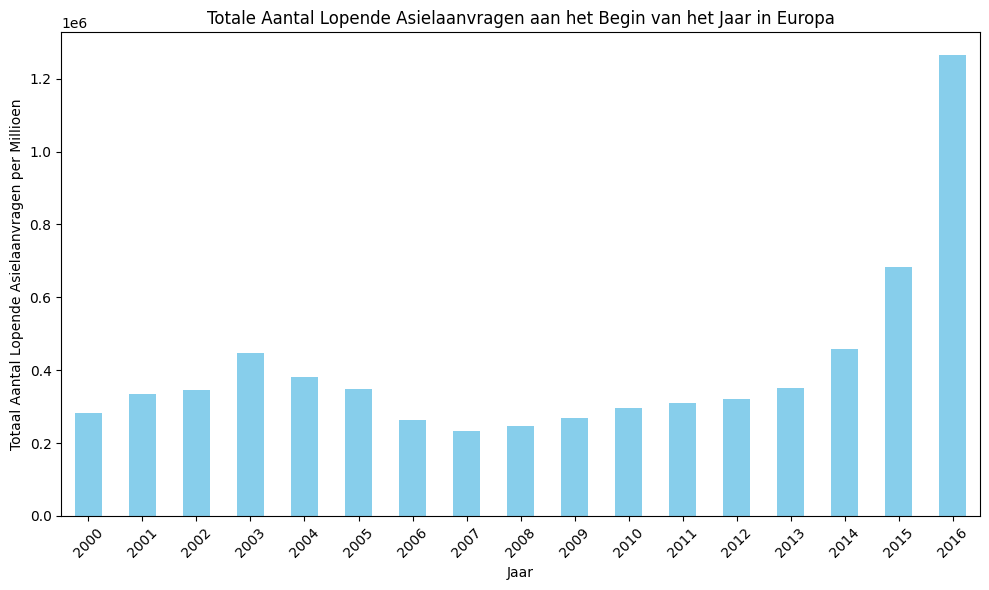

In [26]:
file_path = r'DataSets/preprocessed_asylum_seekers.csv'
data = pd.read_csv(file_path, low_memory=False)


total_pending_start_year_europe = data.groupby('Year')['Tota pending start-year'].sum()

plt.figure(figsize=(10, 6))
total_pending_start_year_europe.plot(kind='bar', color='skyblue')
plt.title('Totale Aantal Lopende Asielaanvragen aan het Begin van het Jaar in Europa')
plt.xlabel('Jaar')
plt.ylabel('Totaal Aantal Lopende Asielaanvragen per Millioen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This graph shows the number of pending asylum applications in Europe from 2000 to 2016. Here’s what it tells us about the refugee crisis:

From 2013 onwards, the number of asylum applications skyrocketed, reaching over 1.2 million in 2016. This sharp rise suggests many people are coming to Europe, likely seeking better economic opportunities rather than fleeing war or persecution.
While before 2013, the number of applications was relatively stable. This indicates that the recent surge is due to new factors, likely related to Europe’s economic appeal and more generous asylum policies.

So the huge number of applications in 2016 shows that the system is under significant pressure. Managing such a large influx is challenging and suggests the crisis is getting worse.

In conclusion: the graph supports the idea that the refugee crisis in Europe is escalating. The dramatic increase in asylum applications suggests many are economic migrants, putting growing pressure on European countries. This indicates a worsening situation that needs urgent attention.


### GRAPH ABOUT CHANCE OF REJECTION

Blablabla

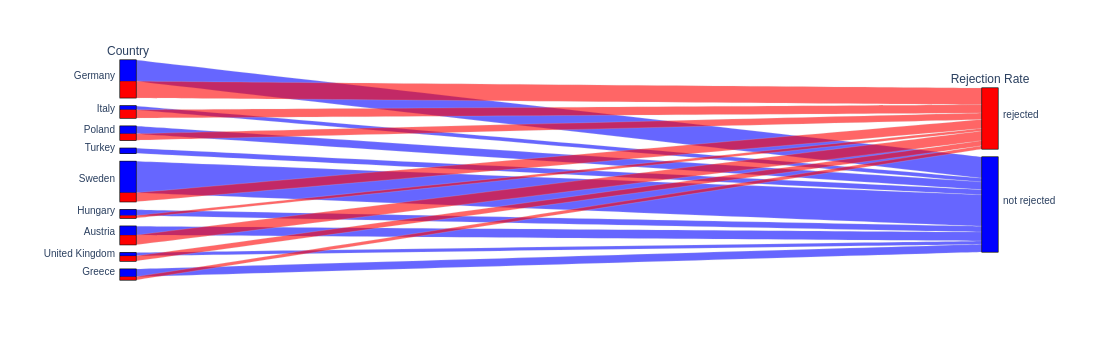

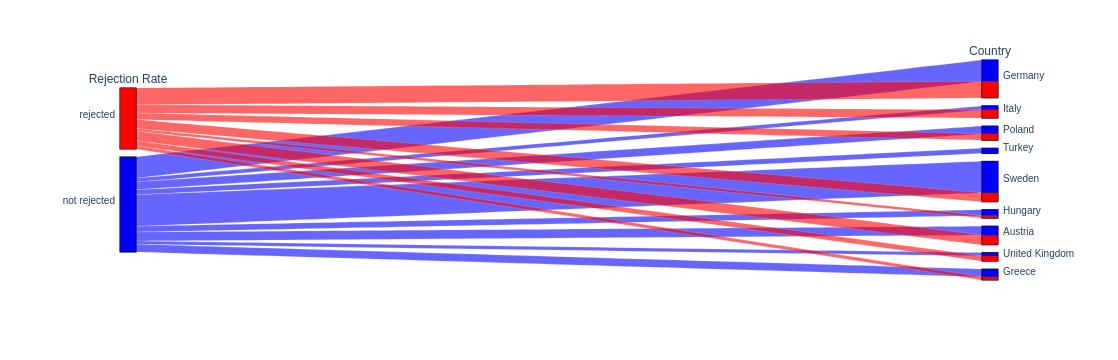

In [29]:
file_path = 'DataSets/refugee_interview_filtered.csv'
population_data = pd.read_csv(file_path)

data = population_data[['VAR01', 'VAR27']].copy()
data.columns = ['Country', 'Rejection_Rate']

color_mapping = {'not rejected': 0, 'rejected': 1}
data['Rejection_Rate_Num'] = data['Rejection_Rate'].map(color_mapping)

color_scale = [(0, 'blue'), (1, 'red')]

# Version with countries on the left
fig = px.parallel_categories(data, dimensions=['Country', 'Rejection_Rate'],
                             labels={'Country': 'Country', 'Rejection_Rate': 'Rejection Rate'},
                             color='Rejection_Rate_Num',
                             color_continuous_scale=color_scale)

fig.update_layout(coloraxis_showscale=False)
fig.show()

# Version with countries on the right
fig2 = px.parallel_categories(data, dimensions=['Rejection_Rate', 'Country'],
                             labels={'Country': 'Country', 'Rejection_Rate': 'Rejection Rate'},
                             color='Rejection_Rate_Num',
                             color_continuous_scale=color_scale)

fig2.update_layout(coloraxis_showscale=False)
fig2.show()


blablabla

### Influence on the economy

The Pearson correlation between GDP per capita and refugees per inhabitant in the provided dataset is approximately 0.274. This indicates a weak positive correlation, suggesting that as GDP per capita increases, the number of refugees per inhabitant also tends to increase slightly.

In [ ]:
# Load the data
file_path = 'DataSets/gdp_pop_ref_2020.csv'
data = pd.read_csv(file_path, delimiter=';')

# Remove non-finite values
data_cleaned = data.dropna(subset=['GDP per Capita 2020']).reset_index(drop=True)

# Calculate refugees per 1,000 population
data_cleaned['Refugees per 1000 Population'] = data_cleaned['Refugees 2020'] / (data_cleaned['Population 2020'] / 1000)

# Bubble chart with GDP per Capita (log scale) and Refugees per 1,000 Population (log scale)
plt.figure(figsize=(12, 8))
bubble_size = data_cleaned['Population 2020'] / 10000  # Adjust size for better visualization

plt.scatter(data_cleaned['GDP per Capita 2020'], data_cleaned['Refugees per 1000 Population'], 
            s=bubble_size, alpha=0.5, c='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('GDP per Capita 2020 (log scale)')
plt.ylabel('Refugees per 1000 Population (log scale)')
plt.title('Bubble Chart: GDP per Capita vs Refugees per 1000 Population (2020)')
plt.grid(True, which="both", ls="--")

# Annotate each bubble with the country name
for i in range(data_cleaned.shape[0]):
    plt.text(data_cleaned['GDP per Capita 2020'][i], data_cleaned['Refugees per 1000 Population'][i], 
             data_cleaned['Country'][i], fontsize=8, ha='right')

plt.show()

The Pearson correlation between GDP per capita and refugees per inhabitant in the provided dataset is approximately 0.274. This indicates a weak positive correlation, suggesting that as GDP per capita increases, the number of refugees per inhabitant also tends to increase slightly.

> *Figure \$: Bubble Chart: Gross Domestic Product (GDP) Per Capita compared to refugees per 1000 of the population in 2020 at log scale* \
> *The size of the bubble indicates the population of the country.*

In [ ]:
# Load the data
file_path = 'DataSets/gdp_ppp_pop_ref_2020.csv'
data = pd.read_csv(file_path, delimiter=';')

# Remove non-finite values
data_cleaned = data.dropna(subset=['GDP PPP per Capita 2020']).reset_index(drop=True)

# Calculate refugees per 1,000 population
data_cleaned['Refugees per 1000 Population'] = data_cleaned['Refugees 2020'] / (data_cleaned['Population 2020'] / 1000)

# Bubble chart with GDP per Capita (log scale) and Refugees per 1,000 Population (log scale)
plt.figure(figsize=(12, 8))
bubble_size = data_cleaned['Population 2020'] / 10000  # Adjust size for better visualization

plt.scatter(data_cleaned['GDP PPP per Capita 2020'], data_cleaned['Refugees per 1000 Population'], 
            s=bubble_size, alpha=0.5, c='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('GDP PPP per Capita 2020 (log scale)')
plt.ylabel('Refugees per 1000 Population (log scale)')
plt.title('Bubble Chart: GDP PPP per Capita vs Refugees per 1000 Population (2020)')
plt.grid(True, which="both", ls="--")

# Annotate each bubble with the country name
for i in range(data_cleaned.shape[0]):
    plt.text(data_cleaned['GDP PPP per Capita 2020'][i], data_cleaned['Refugees per 1000 Population'][i], 
             data_cleaned['Country'][i], fontsize=8, ha='right')

plt.show()

The Pearson correlation between GDP PPP per capita and refugees per inhabitant in the provided dataset is approximately 0.433. This indicates a moderate positive correlation, suggesting that as GDP PPP per capita increases, the number of refugees per inhabitant also tends to increase

> *Figure \$: Bubble Chart: Gross Domestic Product (GDP) at Purchasing Power Parity (PPP) Per Capita compared to refugees per 1000 of the population in 2020 at log scale* \
> *The size of the bubble indicates the population of the country.*

First of all, these charts show that wealthier European countries, like Germany, Sweden, and Austria, have more refugees per 1000 people. This suggests that refugees are targeting these countries for their better living conditions and job opportunities, indicating that many might be economic migrants rather than escaping war or political persecution.

The data also shows that many European countries with higher GDP per capita have more refugees compared to poorer nations. If most refugees were fleeing political or war-related issues, we would expect a more even spread across various countries, including those with lower GDP per capita. The concentration in wealthier countries suggests economic motives.

And even though the graphs focus on 2020, the trend of rising refugee numbers in wealthy European countries suggests the crisis is getting worse. The large bubbles for these countries indicate that the influx of refugees is not temporary but growing. This can strain public services and social systems, making the crisis harder to manage.

Last of all the significant number of refugees in countries like Germany and Sweden, known for their strong economies and generous asylum policies, supports the idea that many are seeking better economic opportunities. The clustering in these affluent countries indicates that many migrants are fortune seekers.

In conclusion the graphs show that the refugee crisis in Europe is worsening and that many refugees are economic migrants. This trend puts increasing pressure on wealthier European countries, suggesting a need for comprehensive policy solutions to address the crisis.

## Reasoning for migration

In [ ]:
Blablabla

In [ ]:
#code

Blablabla

## Reflection

Curabitur non lacus ex. Maecenas at massa ultricies justo venenatis condimentum sed et eros. Ut vitae iaculis massa. Aenean vitae sagittis nibh. Aliquam pharetra dui suscipit purus dictum rutrum. Donec ultricies odio quis porttitor aliquet. Fusce sed nisl non velit rutrum commodo nec sed magna. Morbi non volutpat mi, cursus pulvinar dolor.

Nam sit amet volutpat sapien. Aenean eu mattis neque. Maecenas eget libero consequat, condimentum nulla luctus, fermentum lectus. Donec at enim sit amet dolor vestibulum faucibus. Vestibulum velit elit, faucibus ut mi sit amet, mollis rutrum eros. Ut ut lacinia ante, eu placerat ligula. Fusce quis convallis purus. Maecenas eget fringilla quam.

Proin ac sapien et lectus tempor dignissim a at arcu. Donec placerat aliquet odio, vel aliquam nibh tempus vel. Pellentesque non velit iaculis, porta metus sed, dictum augue. Aenean tempus gravida ullamcorper. Proin cursus fringilla turpis. Integer id lectus dignissim, ultrices metus vel, dictum quam. Suspendisse augue ligula, vestibulum ac nulla a, porta pharetra leo. Integer et pharetra lacus, in porttitor mauris. Cras sodales metus sit amet enim rhoncus sodales. Etiam orci enim, tincidunt eget arcu vel, gravida scelerisque lacus.

## Work Distribution

Curabitur non lacus ex. Maecenas at massa ultricies justo venenatis condimentum sed et eros. Ut vitae iaculis massa. Aenean vitae sagittis nibh. Aliquam pharetra dui suscipit purus dictum rutrum. Donec ultricies odio quis porttitor aliquet. Fusce sed nisl non velit rutrum commodo nec sed magna. Morbi non volutpat mi, cursus pulvinar dolor.

Nam sit amet volutpat sapien. Aenean eu mattis neque. Maecenas eget libero consequat, condimentum nulla luctus, fermentum lectus. Donec at enim sit amet dolor vestibulum faucibus. Vestibulum velit elit, faucibus ut mi sit amet, mollis rutrum eros. Ut ut lacinia ante, eu placerat ligula. Fusce quis convallis purus. Maecenas eget fringilla quam.

Proin ac sapien et lectus tempor dignissim a at arcu. Donec placerat aliquet odio, vel aliquam nibh tempus vel. Pellentesque non velit iaculis, porta metus sed, dictum augue. Aenean tempus gravida ullamcorper. Proin cursus fringilla turpis. Integer id lectus dignissim, ultrices metus vel, dictum quam. Suspendisse augue ligula, vestibulum ac nulla a, porta pharetra leo. Integer et pharetra lacus, in porttitor mauris. Cras sodales metus sit amet enim rhoncus sodales. Etiam orci enim, tincidunt eget arcu vel, gravida scelerisque lacus.

## References

Centraal Bureau voor de Statistiek. (2023). More strikes but fewer strikers in 2022. Statistics Netherlands. https://www.cbs.nl/en-gb/news/2023/18/more-strikes-but-fewer-strikers-in-2022